In [1]:
# Notebook for estimating development from Rt and cases
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
#%matplotlib widget
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
#Settings for plotting
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

#%matplotlib widget
import matplotlib.colors as colors
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
locale.setlocale(locale.LC_ALL,"Danish")

## Useful commands to copy:
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

import os
import math

from datetime import date


saveFigures = True
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Load the admitted file to get weekly number and dates 
dfAdm = pd.read_excel('Admitted/Admitted.xlsx')
dfAdm = dfAdm.transpose()
dfAdm.columns = dfAdm.iloc[0]
dfAdm = dfAdm.drop(['Aldersgruppe']) 
curDates =  pd.to_datetime(dfAdm.index,format='%d_%m_%Y')

In [3]:
# df_RT = pd.read_csv('Rt/Rt_cases_2021_05_18.csv',delimiter=';')
df_RT = pd.read_csv('Rt/Rt_cases_2021_06_01.csv',delimiter=';')

df_RT["SampleDate"] = df_RT["SampleDate"].astype('datetime64[D]')
df_RT['estimate'] = pd.to_numeric(df_RT["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_lower'] = pd.to_numeric(df_RT["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_upper'] = pd.to_numeric(df_RT["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))

# df_RT

In [4]:
# Go through the weekly files and get number of cases
ssidatapath = "ssi_data"
rootdir = os.getcwd()+"/"+ssidatapath

dfCase = pd.DataFrame(columns=dfAdm.columns)
# dfTest = pd.DataFrame(columns=dfAdm.columns)
# dfPosP = pd.DataFrame(columns=dfAdm.columns)

for k in range(0,len(curDates)):
    
    d = curDates[k]
    curIndex = dfAdm.index[k]

    thisDateStr = d.strftime('%Y-%m-%d')
    curDir = rootdir + '/SSI_data_' + thisDateStr 
    curFilePath = curDir + '/Cases_by_age.csv'
    #print(curFilePath)
    try:
        curdf = pd.read_csv(curFilePath,delimiter=';',dtype=str)

        curdf['Antal_bekræftede_COVID-19'] = pd.to_numeric(curdf['Antal_bekræftede_COVID-19'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Antal_testede'] = pd.to_numeric(curdf['Antal_testede'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Procent_positive'] = pd.to_numeric(curdf['Procent_positive'].astype(str).apply(lambda x: x.replace(',','.')))

        dfCase.loc[curIndex] = curdf['Antal_bekræftede_COVID-19'].values
        # dfTest.loc[curIndex] = curdf['Antal_testede'].values
        # dfPosP.loc[curIndex] = curdf['Procent_positive'].values
    except:
        print("file_not_found:")
        print(curFilePath)


file_not_found:
/home/berrig/Documents/PandemiX/DanskeData/ssi_data/SSI_data_2020-11-17/Cases_by_age.csv


In [5]:
# Calculate the weekly change
dfCaseDiff = dfCase.diff().iloc[1:]
# Modify the data to suit the actual vaccinated groups:
dfCaseDiff["10-19"] = dfCaseDiff["10-19"].apply(lambda x: int(0.4*x))
# Get the names of the age-groups
allCols = dfCase.columns
# Format the dates into datetime
plotDates =  pd.to_datetime(dfCaseDiff.index,format='%d_%m_%Y')
# Print the latest results to check
dfCaseDiff.tail()

Aldersgruppe,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
04_05_2021,477,390,1204,836,827,699,372,120,16,6,5532
11_05_2021,503,538,1416,942,926,786,377,107,26,1,6431
18_05_2021,569,686,1748,999,1009,823,354,99,17,7,7342
25_05_2021,448,616,1880,883,994,817,319,65,5,1,6952
01_06_2021,467,580,1989,899,1005,808,245,41,20,4,6928


In [6]:
# Calculation of size of age-group
dfAges = pd.read_excel('DKfolketal2021clean.xlsx')
DK_age = []


#a_list = list(range(0, 100, 10))
#for i, a in enumerate(a_list):
#    if a == a_list[-1]:
#        DK_age.append(dfAges.iloc[a:].Antal.sum())
#    else:
#        DK_age.append(dfAges.iloc[a:a_list[i+1]].Antal.sum())
#DK_age.append(dfAges.Antal.sum())

DK_age.append(dfAges.iloc[0:10].Antal.sum())
DK_age.append(dfAges.iloc[16:20].Antal.sum())
DK_age.append(dfAges.iloc[20:30].Antal.sum())
DK_age.append(dfAges.iloc[30:40].Antal.sum())
DK_age.append(dfAges.iloc[40:50].Antal.sum())
DK_age.append(dfAges.iloc[50:60].Antal.sum())
DK_age.append(dfAges.iloc[60:70].Antal.sum())
DK_age.append(dfAges.iloc[70:80].Antal.sum())
DK_age.append(dfAges.iloc[80:90].Antal.sum())
DK_age.append(dfAges.iloc[90:].Antal.sum())
DK_age.append(dfAges.Antal.sum())


DK_age = np.array(DK_age)
DK_age

# case_hosp_rate_pct = [0.953, 0.453, 1.590, 3.431, 4.505, 7.297, 10.494, 16.836, 26.506, 2.083] # Old
case_hosp_rate_pct = [1.24, 0.43, 1.56, 3.09, 4.68, 6.89, 8.68, 16.48, 55.67, 8.33] # Opdateret 01 / 06
case_hosp_rate = np.array([i/100 for i in case_hosp_rate_pct])

# 0-29, 30-69, 70-

bd_0 = np.mean([10.2, 9.8, 9.5, 9.6])
bd_1 = np.mean([5.7, 7.5, 7.0, 6.3])
bd_2 = np.mean([6.6, 7.3, 6.1, 5.0])

print("blood_donor_numbers:")
print(bd_0, bd_1, bd_2)

immune_rate = np.array([bd_0/100]*3 + [bd_1/100]*2 + [bd_2/100]*5)

blood_donor_numbers:
9.775 6.625 6.25


In [7]:
# Vaccinationskalender, manuelt aflæst 01/06-2021
vaccKal = pd.DataFrame()

neverDate = np.datetime64('2021-10-30') # A day "far out" in the future, to not show on plot
vaccKal['0-9'] = [neverDate,neverDate,neverDate,neverDate]

vaccKal['10-19'] = [np.datetime64('2021-05-17'),np.datetime64('2021-06-27'),
                    np.datetime64('2021-06-27'),np.datetime64('2021-08-01')]

vaccKal['20-29'] = [np.datetime64('2021-07-01'),np.datetime64('2021-08-08'),
                    np.datetime64('2021-08-08'),np.datetime64('2021-09-12')]

vaccKal['30-39'] = [np.datetime64('2021-06-14'),np.datetime64('2021-08-22'),
                    np.datetime64('2021-08-22'),np.datetime64('2021-09-12')]

vaccKal['40-49'] = [np.datetime64('2021-05-17'),np.datetime64('2021-07-11'),
                    np.datetime64('2021-07-11'),np.datetime64('2021-08-15')]

vaccKal['50-59'] = [np.datetime64('2021-05-03'),np.datetime64('2021-06-06'),
                    np.datetime64('2021-06-06'),np.datetime64('2021-07-11')]

vaccKal['60-69'] = [np.datetime64('2021-04-05'),np.datetime64('2021-05-23'),
                    np.datetime64('2021-05-23'),np.datetime64('2021-06-27')]

vaccKal['70-79'] = [np.datetime64('2021-03-29'),np.datetime64('2021-05-02'),
                    np.datetime64('2021-05-02'),np.datetime64('2021-06-06')]

vaccKal['80-89'] = [np.datetime64('2021-02-01'),np.datetime64('2021-04-04'),
                    np.datetime64('2021-03-04'),np.datetime64('2021-05-02')]

vaccKal['90+'] =   [np.datetime64('2021-02-01'),np.datetime64('2021-02-15'),
                    np.datetime64('2021-02-22'),np.datetime64('2021-03-15')]

# vaccKal['I alt'] = [np.datetime64('2021-07-19'),np.datetime64('2021-08-02'),np.datetime64('2021-08-31')]
vaccKal['I alt'] = [neverDate,neverDate,neverDate,neverDate]

vaccKal


# # Vaccinationskalender, manuelt aflæst 12/05-2021
# vaccKal = pd.DataFrame()

# neverDate = np.datetime64('2021-10-30') # A day "far out" in the future, to not show on plot
# vaccKal['0-9'] = [neverDate,neverDate,neverDate,neverDate]

# vaccKal['10-19'] = [np.datetime64('2021-05-24'),np.datetime64('2021-06-20'),
#                     np.datetime64('2021-06-20'),np.datetime64('2021-07-18')]

# vaccKal['20-29'] = [np.datetime64('2021-06-14'),np.datetime64('2021-07-25'),
#                     np.datetime64('2021-07-25'),np.datetime64('2021-08-29')]

# vaccKal['30-39'] = [np.datetime64('2021-06-28'),np.datetime64('2021-08-08'),
#                     np.datetime64('2021-08-08'),np.datetime64('2021-08-29')]

# vaccKal['40-49'] = [np.datetime64('2021-05-24'),np.datetime64('2021-07-04'),
#                     np.datetime64('2021-07-04'),np.datetime64('2021-08-08')]

# vaccKal['50-59'] = [np.datetime64('2021-05-03'),np.datetime64('2021-06-06'),
#                     np.datetime64('2021-06-06'),np.datetime64('2021-07-11')]

# vaccKal['60-69'] = [np.datetime64('2021-04-05'),np.datetime64('2021-05-23'),
#                     np.datetime64('2021-05-23'),np.datetime64('2021-06-27')]

# vaccKal['70-79'] = [np.datetime64('2021-03-29'),np.datetime64('2021-05-02'),
#                     np.datetime64('2021-05-02'),np.datetime64('2021-06-06')]

# vaccKal['80-89'] = [np.datetime64('2021-02-01'),np.datetime64('2021-04-04'),
#                     np.datetime64('2021-03-04'),np.datetime64('2021-05-02')]

# vaccKal['90+'] =   [np.datetime64('2021-02-01'),np.datetime64('2021-02-15'),
#                     np.datetime64('2021-02-22'),np.datetime64('2021-03-15')]

# # vaccKal['I alt'] = [np.datetime64('2021-07-19'),np.datetime64('2021-08-02'),np.datetime64('2021-08-31')]
# vaccKal['I alt'] = [neverDate,neverDate,neverDate,neverDate]

# vaccKal

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
0,2021-10-30,2021-05-17,2021-07-01,2021-06-14,2021-05-17,2021-05-03,2021-04-05,2021-03-29,2021-02-01,2021-02-01,2021-10-30
1,2021-10-30,2021-06-27,2021-08-08,2021-08-22,2021-07-11,2021-06-06,2021-05-23,2021-05-02,2021-04-04,2021-02-15,2021-10-30
2,2021-10-30,2021-06-27,2021-08-08,2021-08-22,2021-07-11,2021-06-06,2021-05-23,2021-05-02,2021-03-04,2021-02-22,2021-10-30
3,2021-10-30,2021-08-01,2021-09-12,2021-09-12,2021-08-15,2021-07-11,2021-06-27,2021-06-06,2021-05-02,2021-03-15,2021-10-30


In [8]:
# Get the daily cases (Run young_age_groups to save new csv)
dfCaseDiffDaily = pd.read_csv('DailyCasesAveraged.csv')

# Get the corresponding dates
curDatesDaily = pd.to_datetime(dfCaseDiffDaily.Dato).values
plotDatesDaily = np.arange(curDatesDaily[0],curDatesDaily[-1]+np.timedelta64(1,'D'),np.timedelta64(1,'D'))

# Adjust to vaccinated groups:
dfCaseDiffDaily["10-19"] = dfCaseDiffDaily["10-19"].apply(lambda x: x*0.4)

# Print to see the last days
dfCaseDiffDaily.tail()



,Unnamed: 0,Dato,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
386,386,2021-05-28,58.000000,87.600000,297.000000,125.0,141.000000,104.000000,44.0,6.000000,2.000000,1.0,997.000000
387,387,2021-05-29,66.333333,69.466667,267.666667,139.0,140.333333,109.666667,36.0,6.333333,3.666667,1.0,943.666667
388,388,2021-05-30,66.333333,69.466667,267.666667,139.0,140.333333,109.666667,36.0,6.333333,3.666667,1.0,943.666667
389,389,2021-05-31,66.333333,69.466667,267.666667,139.0,140.333333,109.666667,36.0,6.333333,3.666667,1.0,943.666667
390,390,2021-06-01,77.000000,79.200000,262.000000,107.0,134.000000,95.000000,25.0,6.000000,4.000000,0.0,908.000000


In [9]:
def time_intervals(t_init, t_cur, t_final):
    tspan = np.timedelta64(t_final - t_init,'D')
    dt = np.timedelta64(pd.to_datetime(t_cur) - t_init,'D') 
    return dt/tspan, dt, tspan

def contact_number(t_list, vcal, RT, x1=0.75, x2=0.95, t_shift=np.timedelta64(14, "D")):
    #t_shift = np.timedelta64(14, "D")
    ret = np.zeros(np.shape(t_list))
    for i, t in enumerate(t_list):
        t = t-t_shift
        if t < vcal[0]:
            ret[i] = RT
        elif vcal[0] <= t < vcal[1]:
            rt, dt, tspan = time_intervals(vcal[0], t, vcal[1])
            ret[i] = RT*((1-rt) + rt*(1-x1))
        elif vcal[1] <= t < vcal[2]:
            ret[i] = RT*(1-x1)
        elif vcal[2] <= t < vcal[3]:
            rt, dt, tspan = time_intervals(vcal[2], t, vcal[3])
            ret[i] = RT*((1-rt)*(1-x1) + rt*(1-x2))
        elif vcal[3] <= t:
            ret[i] = RT*(1-x2)
    return ret

def predicted_cases(t_list, vcal, RT, gen_time=4.7/7, init_count=1, S0=100000, x1=0.75, x2=0.95, t_shift=np.timedelta64(14, "D")):
    cn = contact_number(t_list, vcal, RT, x1=x1, x2=x2, t_shift=t_shift)
    ret = np.zeros(np.shape(cn))
    S = S0
    ret[0] = init_count
    dark_count = 2
    for i, c in enumerate(cn[1:], 1):
        dt = float(np.timedelta64(t_list[i]-t_list[i-1],"D")/np.timedelta64(7,"D"))
        ret[i] = ret[i-1]*(c**(dt/gen_time))*S/S0
        S = int(S > ret[i-1]*dark_count)*(S - ret[i-1]*dark_count)
    return ret
    
def plot_vacc(ax, vaccKal, endtime, vacc_break=False):
    vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal

    ax.axvspan(vaccOneIni,vaccOneFin,color='aquamarine',label='Første dosis')
    if vacc_break:
        ax.axvspan(vaccOneFin,vaccTwoIni,color='yellow',label='Første dosis færdig')
    ax.axvspan(vaccTwoIni,vaccTwoFin,color='palegreen',label='Anden dosis')
    ax.axvspan(vaccTwoFin,endtime,color='springgreen',label='Færdigvaccineret')
    

#def pct_dots(ax, xes, modelCounts, normConst, top=None):
#    pct_list = list(range(0,101,1))
#    modelCounts_cumul = modelCounts.cumsum()
#    if top == None:
#        top = max(modelCounts)*1.1
#    print(top)
#    for l in pct_list:
#        for j, c in enumerate(modelCounts_cumul[:-1]/normConst):
#            if (c <= l/100 < modelCounts_cumul[j+1]/normConst) and (modelCount[j+1] < top):
#                pct_str = f"{100*modelCounts_cumul[j+1]/normConst:.1f}%"
#                ax.plot(xes[j+1], modelCount[j+1], "+r")
#                ax.text(xes[j+1], modelCount[j+1]+25, pct_str, color="red", fontsize=14)

cmap_name = "viridis" # "rainbow" # "jet" # "cool" # 'plasma'
delay_start = np.timedelta64(0,'D')

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


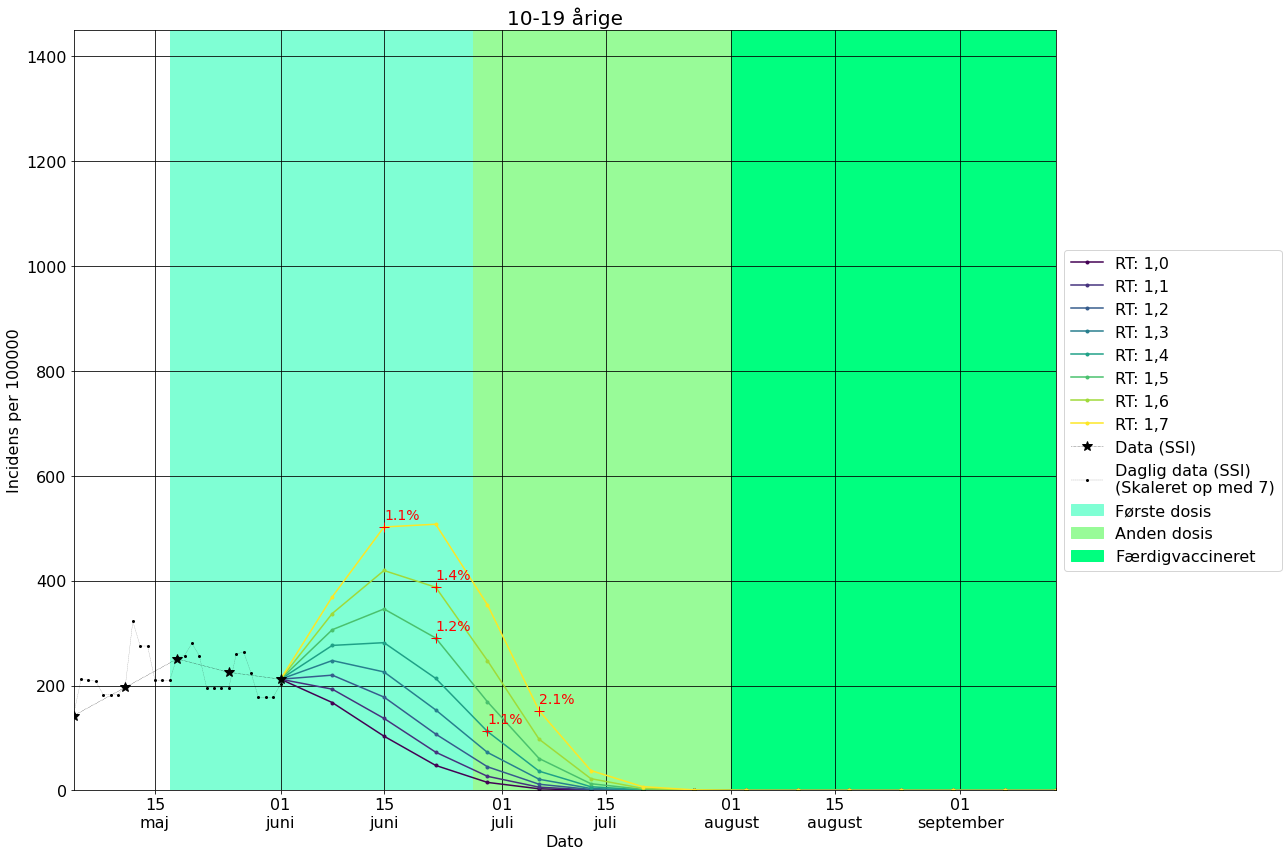

In [10]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

fig,ax1 = plt.subplots(1,1,figsize=(18,12))

# Decide which agegroup to show (see allCols list)
i = 1
curAge = allCols[i]
curPopSize = DK_age[i]
curImmuneRate = immune_rate[i]

# Use latest day with data
tStart = plotDates[-1] + delay_start
#print(t_start)
# Predict tEndWeeks forward
tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
# -delay_start
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

# How much to show in plot
xLims = [tStart-tDelta*4,tSpanPlot[-1]]


# Get data and initial condition
curData = dfCaseDiff[curAge].values
iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]
iniCount = iniRow[curAge].values[0]

# Get vaccination dates from calendar and Plot vaccinations
plot_vacc(ax1, vaccKal[curAge], tSpanPlot[-1])

# Go through a number of RT's
allRTs = np.arange(1.0,1.8,0.1)
# Define a colormap for predictions
cmap = plt.cm.get_cmap(cmap_name,len(allRTs))
cmap_prop = plt.cm.get_cmap('cividis',len(allRTs))
for k in range(0,len(allRTs)):
    
    curRT = allRTs[k]
    curLabel = f'RT: {curRT:.1f}'.replace('.',',')
    # ax1.plot(tSpanPlot,100000 * modelCount/curPopSize,'.-',#label=curLabel,
    #          linewidth=1.5,markersize=6,color=cmap(k), alpha=0.0)
    
    modelCount2 = predicted_cases(tSpanPlot, vaccKal['10-19'], curRT, 
                                  S0=curPopSize*(1-curImmuneRate), init_count=iniCount)
    ax1.plot(tSpanPlot,100000 * modelCount2/curPopSize,'.-',label=curLabel,
             linewidth=1.5,markersize=6,color=cmap(k))
    
    modelCount2_cumul = modelCount2.cumsum()
    pct_list = list(range(0,11,1))
    for i in pct_list:
        for j, c in enumerate(modelCount2_cumul[:-1]/curPopSize):
            if c <= i/100 < modelCount2_cumul[j+1]/curPopSize:
                pct_str = f"{100*modelCount2_cumul[j+1]/curPopSize:.1f}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)
                
# Plot data
ax1.plot(plotDates,100000 * curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
# Also plot daily data, scaled up to weekly numbers
curDataDaily = dfCaseDiffDaily[curAge].values
ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=1450)
# ax1.set_yscale("log")

ax1.set_xlim(xLims)
# Readable dates on x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_ylabel('Incidens per 100000')
ax1.set_xlabel('Dato')

ax1.grid(color='black')

ax1.set_title(curAge+' årige')
if (curAge == 'I alt'):
    ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

10-19 273589
20-29 778740
30-39 696679
40-49 748824
50-59 801166
60-69 667583
70-79 574697
80-89 236648
90+ 45458


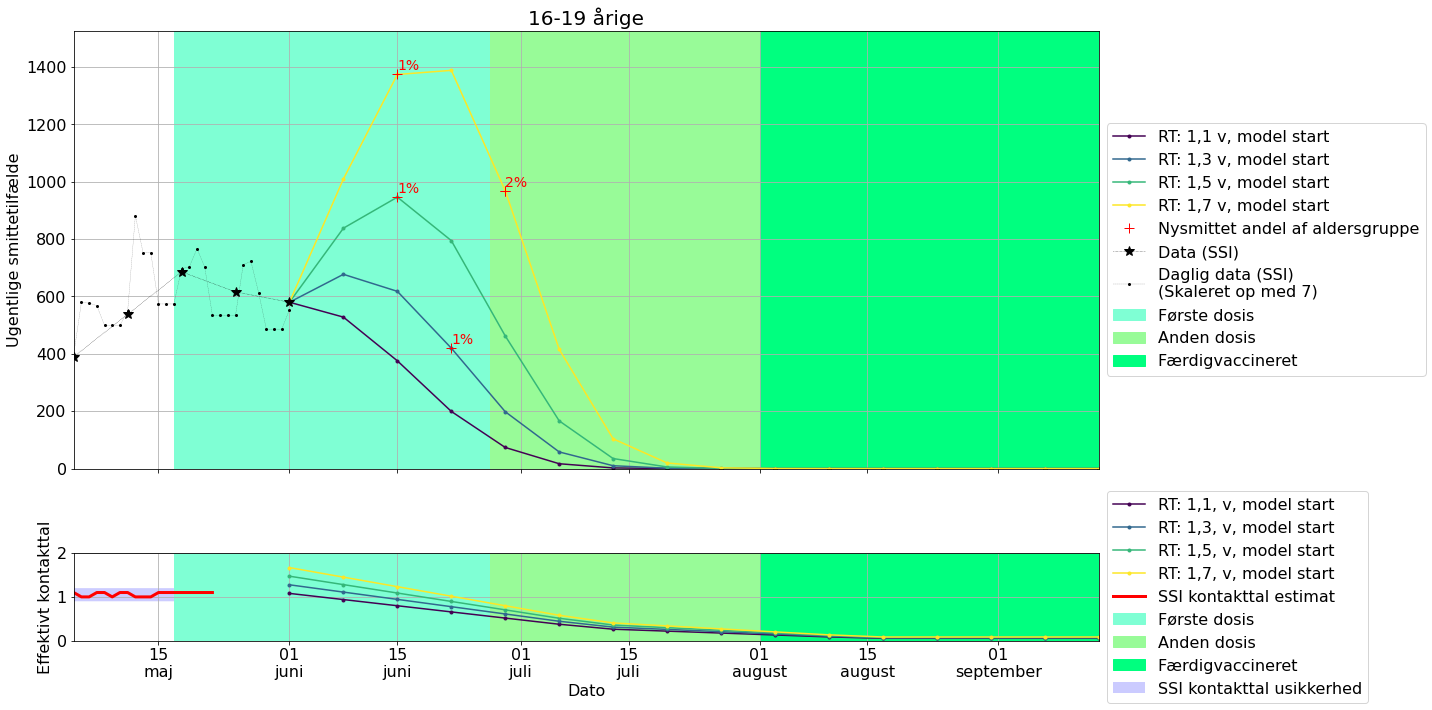

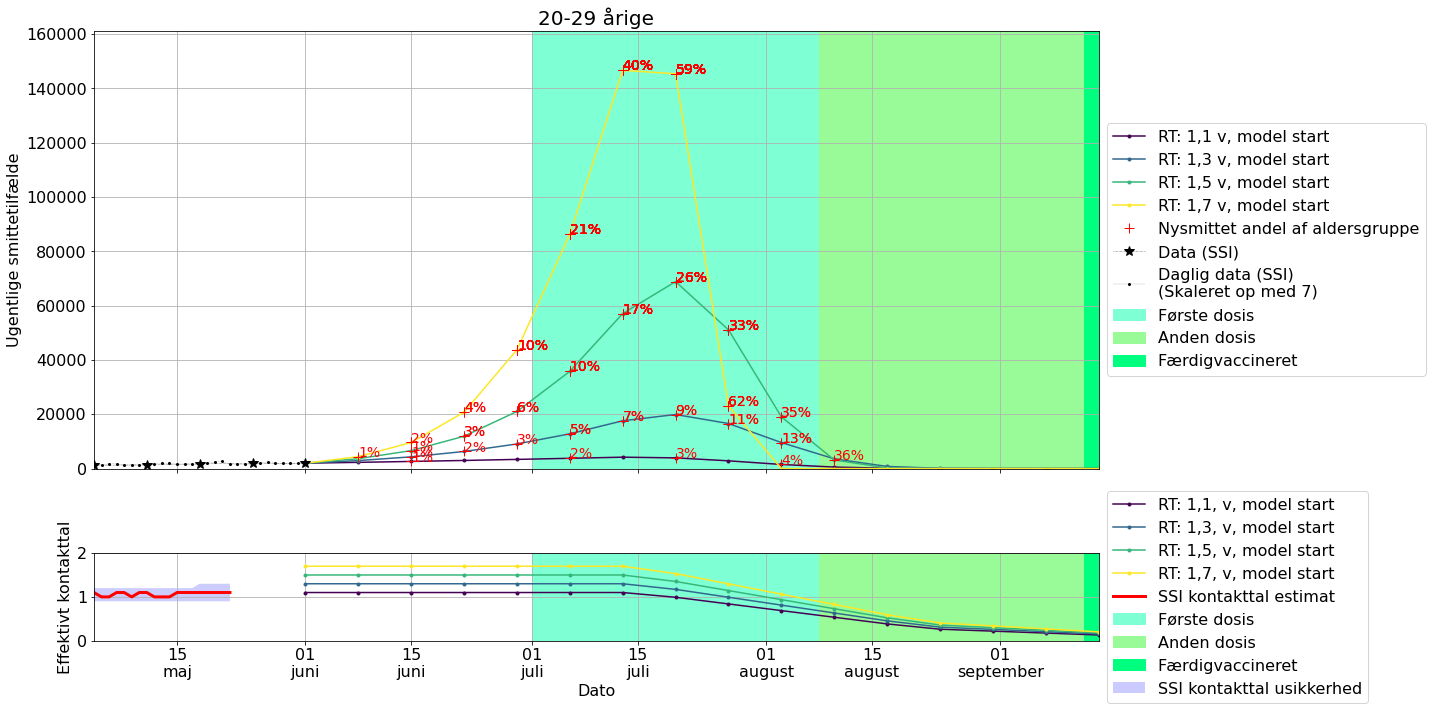

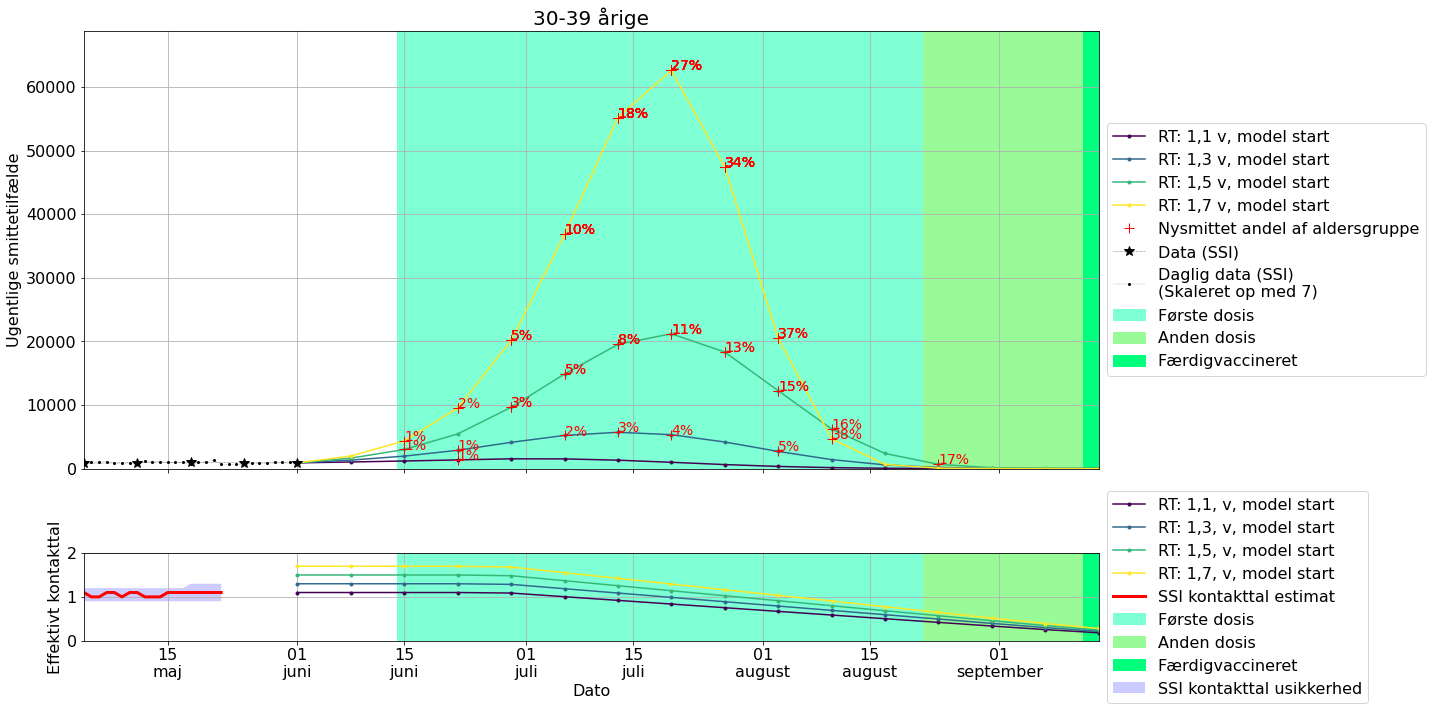

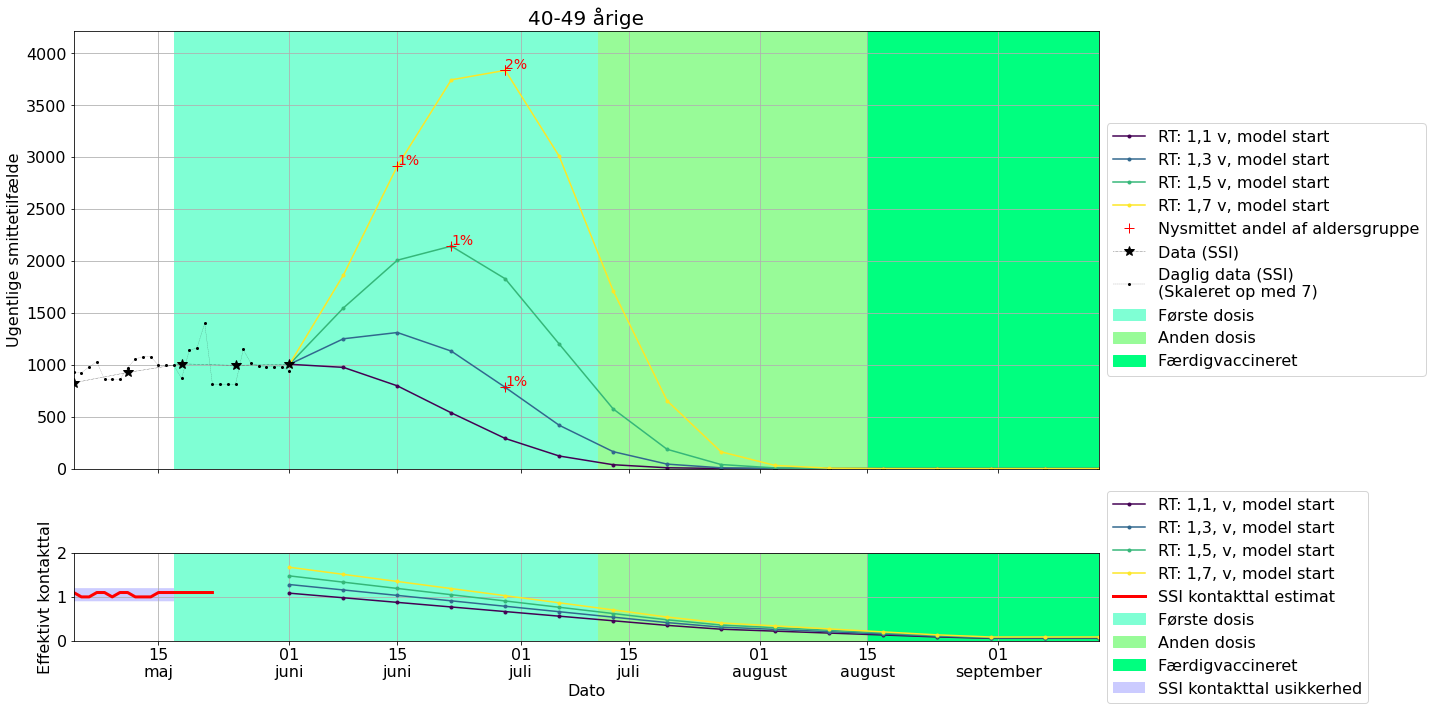

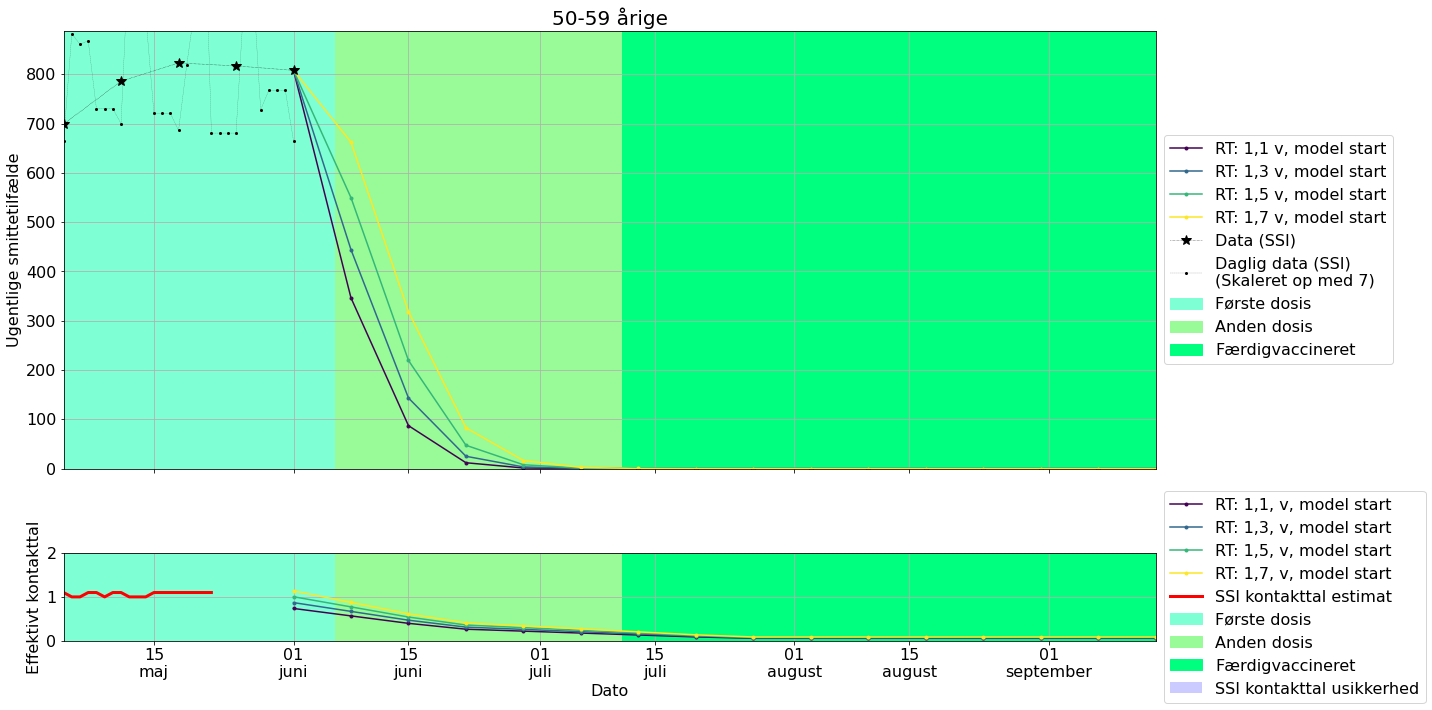

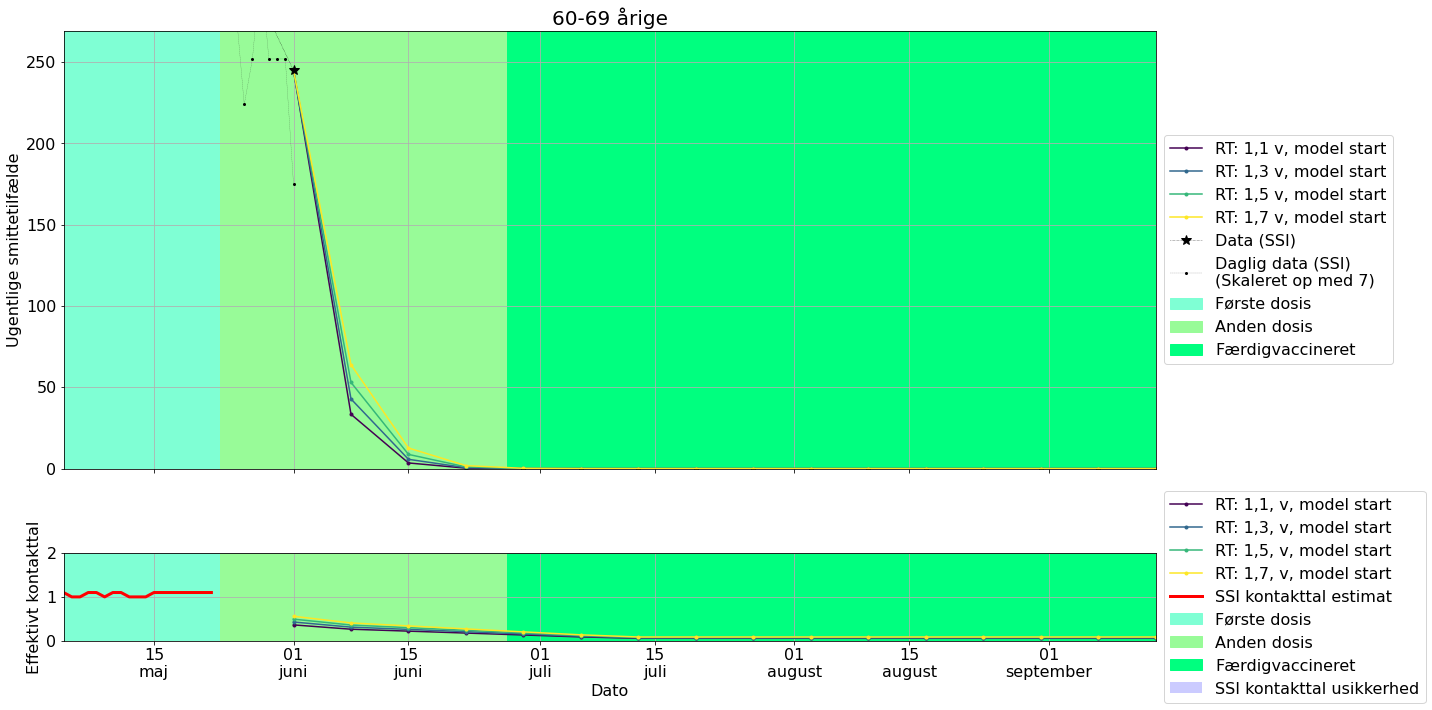

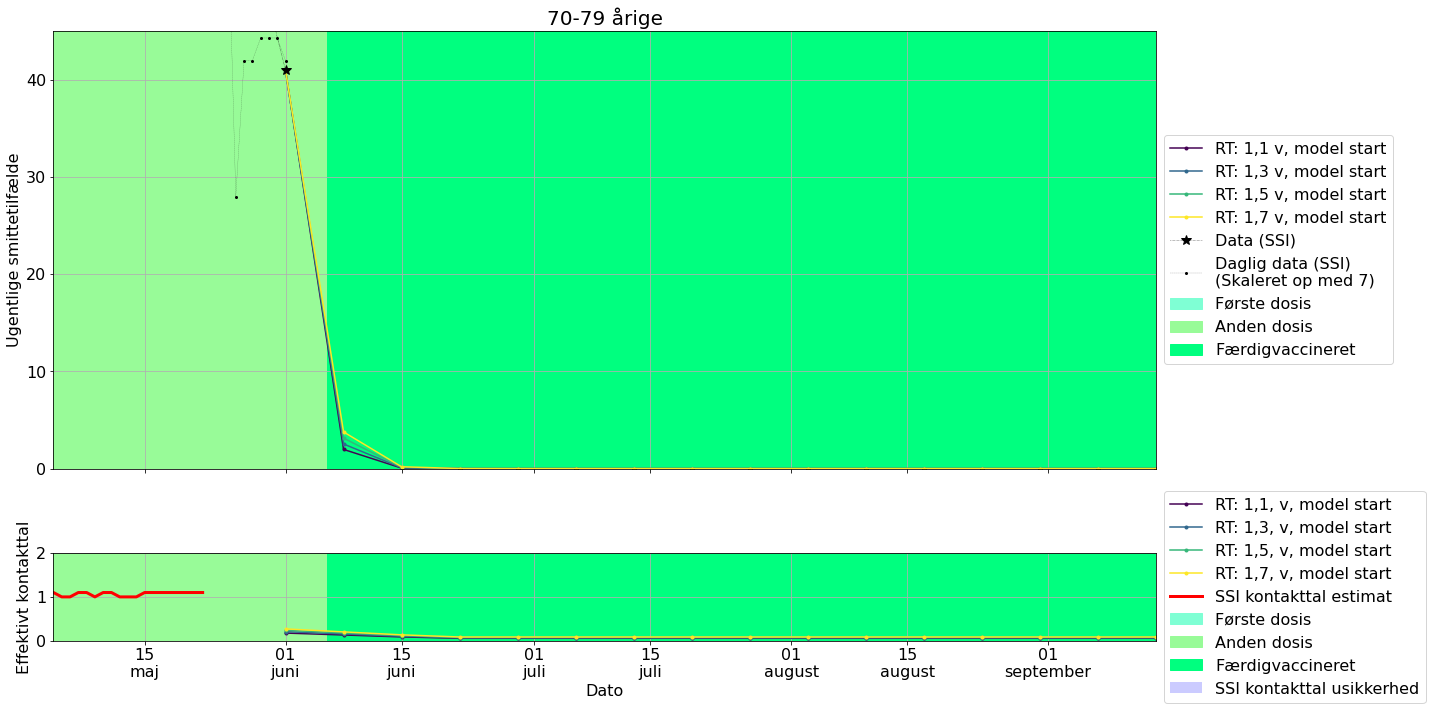

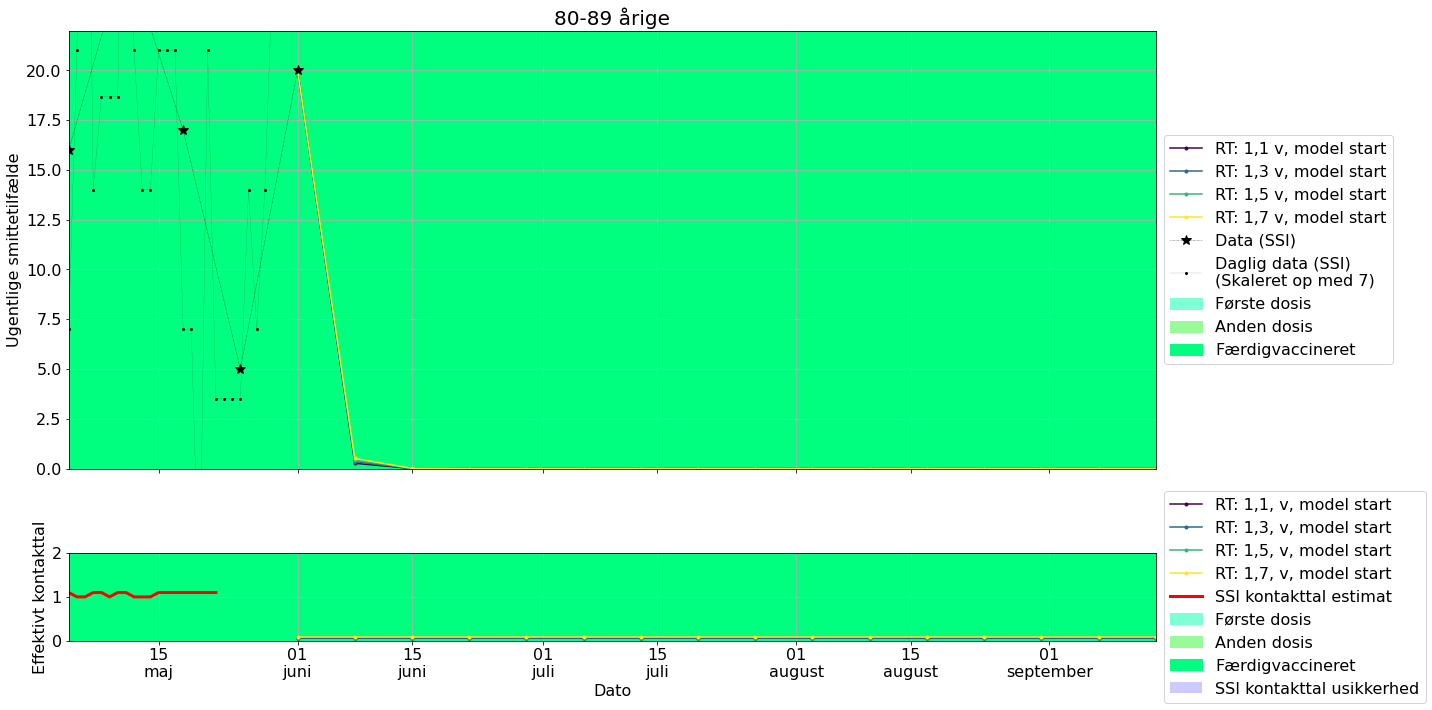

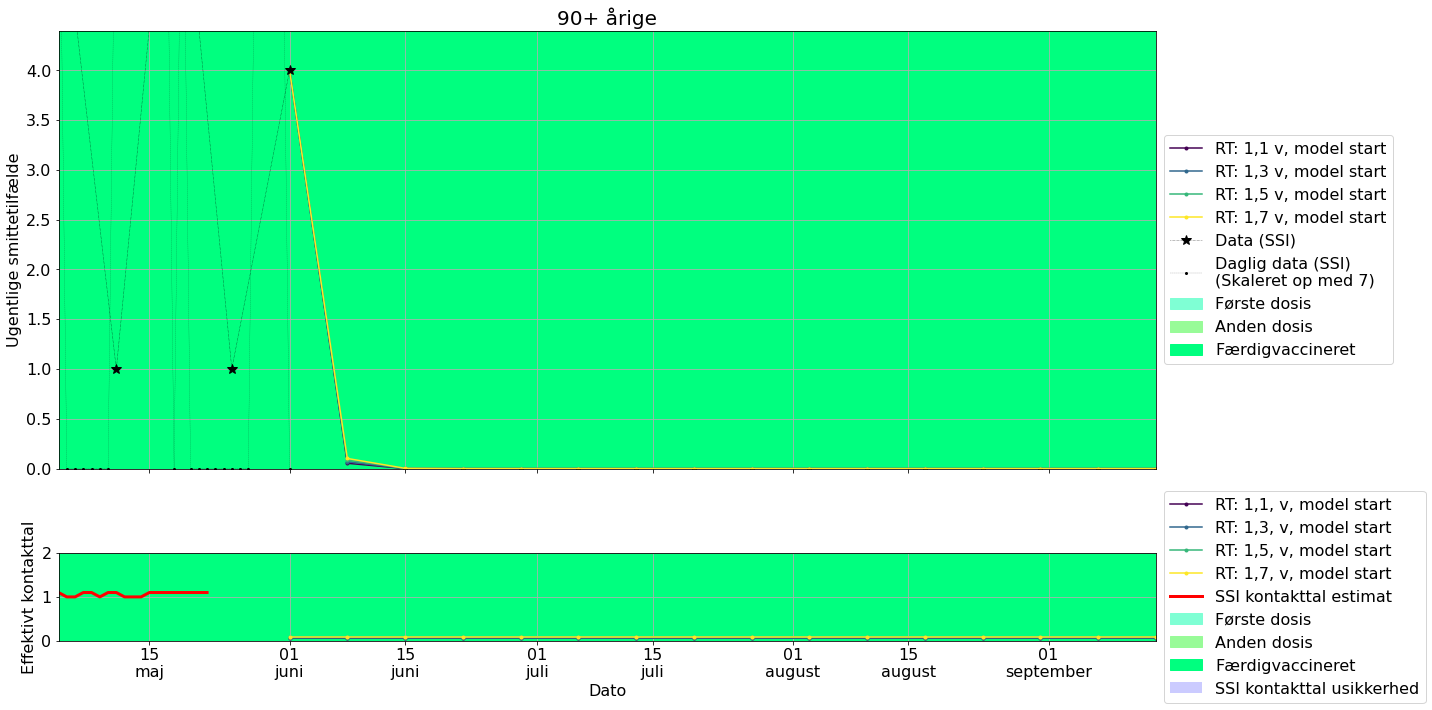

In [11]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

showMax = False

# tStart = np.datetime64('2021-04-27')
tStart = plotDates[-1] + delay_start

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

curCols = dfCaseDiff.columns

allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))


for i, col in enumerate(curCols[1:-1], 1):

    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]
    print(curAge, curPopSize)

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]

    curMax = 1200

    #fig2,ax2 = plt.subplots(1,1,figsize=(20,10))
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,10), sharex=True, gridspec_kw={"height_ratios":[5,1]})
    
    plot_vacc(ax1, vaccKal[curAge], tSpanPlot[-1])
    plot_vacc(ax2, vaccKal[curAge], tSpanPlot[-1])

    # for curRT in allRTs:
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount)
        # ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize, '.-', 
        ax1.plot(tSpanPlot, modelCount2, '.-', 
                 label=f'RT: {curRT:.1f} v. model start'.replace('.',','),
                 linewidth=1.5, markersize=6, color=cmap(k))
        
        ax2.plot(tSpanPlot, contact_number(tSpanPlot, vaccKal[curAge], curRT), '.-', 
                 label=f'RT: {curRT:.1f}, v. model start'.replace('.',','), 
                 linewidth=1.5, markersize=6, color=cmap(k))

        #curMax = max(100000*modelCount2/curPopSize)*1.1
        curMax = max(modelCount2)*1.1
        modelCount2_cumul = modelCount2.cumsum()
        rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

        pct_list = list(range(0,101,1))
        for i in pct_list:
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]
            for j, c in enumerate(rmc[:-1]/curPopSize):
                filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
                #if (filt and 100000*modelCount2[j+1]/curPopSize < curMax):
                if (filt and modelCount2[j+1] < curMax):
                    pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                    #ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                    #ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)
                    ax1.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                    ax1.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)
                    if i==1 and curRT==max(allRTs):
                        # ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, 
                        ax1.plot(tSpanPlot[j+1], modelCount2[j+1], 
                                 "+r", label="Nysmittet andel af aldersgruppe")


    ax2.fill_between(df_RT["SampleDate"], df_RT["uncertainty_lower"], df_RT["uncertainty_upper"], 
                     label="SSI kontakttal usikkerhed", facecolor="blue", alpha=0.2)
    ax2.plot(df_RT["SampleDate"], df_RT["estimate"], label="SSI kontakttal estimat", 
             color="red", linestyle="-")                    
    
    # ax1.plot(plotDates, 100000*curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
    ax1.plot(plotDates, curData,'k*:',linewidth=0.5,label=f'Data (SSI)')
    
    # ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',
    ax1.plot(plotDatesDaily,(curDataDaily*7),'k.:',
             linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')

    ax1.set_ylim(bottom=0, top=curMax)
    ax2.set_ylim(bottom=0, top=2)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
    ax1.set_xlim(xLims)

    ax1.set_ylabel('Ugentlige smittetilfælde') #('Ugentlig incidens per 100.000 borgere')
    ax2.set_ylabel('Effektivt kontakttal')
    ax2.set_xlabel('Dato')

    ax1.grid()
    ax2.grid()
    
    ax1.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    
    ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
    
    ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

    plt.tight_layout()

    if saveFigures:
        plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)

    

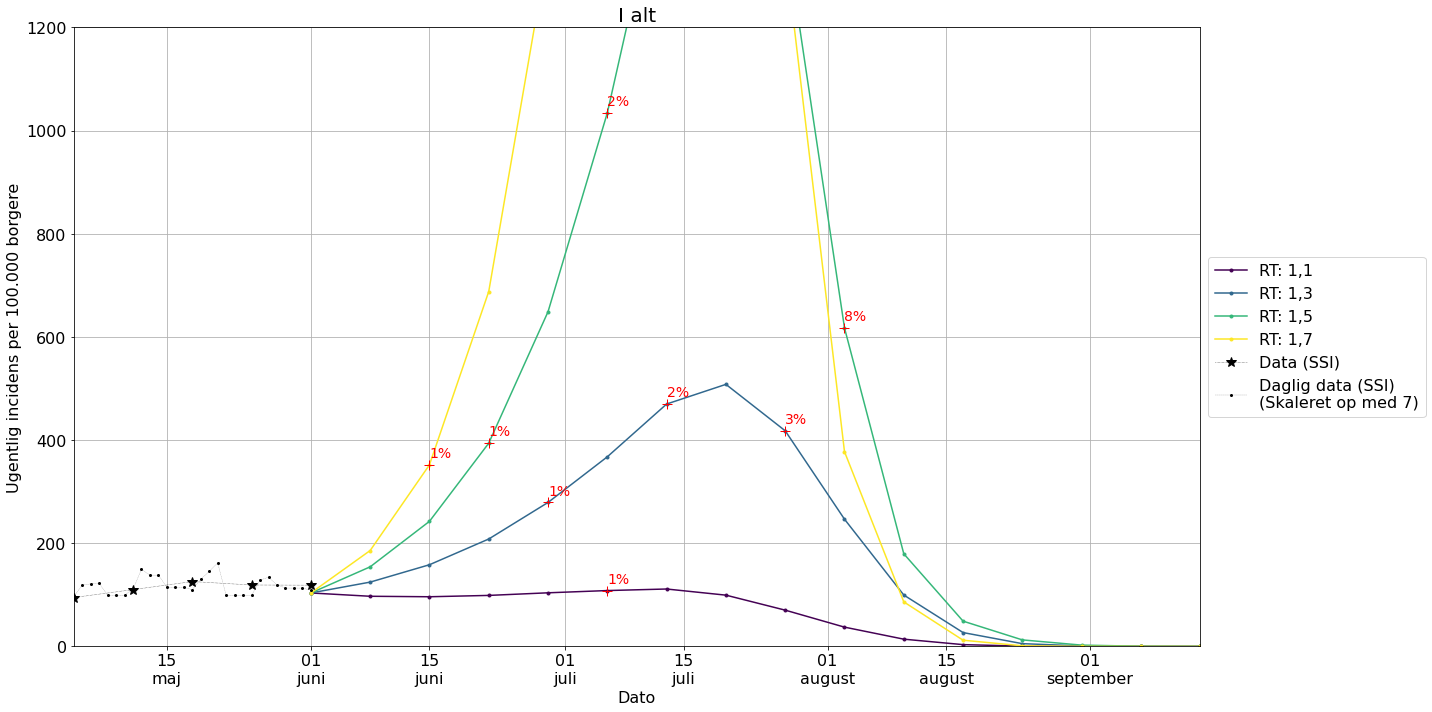

In [12]:
# Here comes the "I alt" plot

allRTs = np.arange(1.1,1.8,0.2)

tStart = plotDates[-1]+delay_start
# print(tStart)

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart, tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

curCols = dfCaseDiff.columns

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

curMax = 1200


weights = [l/DK_age[-1] for l in DK_age[:-1]]
modArray = []
modCN = []

for i in range(0,len(curCols[:-1])):
    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]

    # vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]

    # for curRT in allRTs:
    RTArray = []
    CNArray = []
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount)
        CN = contact_number(tSpanPlot, vaccKal[curAge], curRT)
        
        RTArray.append(modelCount2)
        CNArray.append(modelCount2)

    modArray.append(RTArray)
    modCN.append(CNArray)


RTmodels_avg = []
CNmodels_avg = []
for i in range(0,len(allRTs)):
    avg_tmp = [len(curCols[1:-1])*sum([weights[j]*modArray[j][i][k] for j, col in enumerate(curCols[1:-1],1)])
               for k in range(len(tSpanPlot))]
    RTmodels_avg.append(avg_tmp)


i = 10
curAge = curCols[i]
curPopSize = DK_age[i]

curData = dfCaseDiff[curAge].values
curDataDaily = dfCaseDiffDaily[curAge].values
iniCount = iniRow[curAge].values[0]

RTmodels_avg = np.array(RTmodels_avg)

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

fig,ax1 = plt.subplots(1,1,figsize=(20,10))

for k in range(0,len(allRTs)):
    
    modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
    
    ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
             linewidth=1.5,markersize=6,color=cmap(k))
    
    modelCount2_cumul = modelCount2.cumsum()
    rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

    pct_list = list(range(0,101,1))
    for i in pct_list:
        for j, c in enumerate(rmc[:-1]/curPopSize):
            filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
            if filt and 100000*modelCount2[j+1]/curPopSize < curMax:
                pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)

ax1.plot(plotDates, 100000*curData/curPopSize, 'k*:', linewidth=0.5,label=f'Data (SSI)')

ax1.plot(plotDatesDaily, 100000*(curDataDaily*7)/curPopSize, 'k.:',
         linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=curMax)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
ax1.set_xlabel('Dato')

ax1.grid()

ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)
        

# Tables

In [13]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
# fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

#tStart = np.datetime64('2021-05-18')
tStart = plotDates[-1] +delay_start
print(tStart)

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    #curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    # vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    # curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    # if (curAge == 'I alt'):
    #     curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            for v1 in np.arange(vacc1_min, vacc2_min, 0.05):
                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, 
                                              x1=v1)

                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                # curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                #            linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                for n in range(len(tSpanPlot)):
                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    model_df = model_df.append(new_row, ignore_index=True)

                RTArray.append(modelCount2)

                # pct_list = list(range(1,101,1))
                # for l in pct_list:
                #     for j, c in enumerate(rmc[:-1]/curPopSize):
                #         filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                #         if filt and (modelCount2[j+1] < top):
                #             pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                #             curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                #             curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)


    # urAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
    #            linewidth=0.25, markersize=4)

    # curAx.set_ylim(bottom=0, top=top)

    # curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    # curAx.set_xlim(xLims)

    # curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    # curAx.grid(axis='y')

    # curAx.legend()
    # curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

# if saveFigures:
#     plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction_var_vacc.csv')
model_df.loc[model_df["Age"]=="30-39"]

2021-06-01 00:00:00


,Age,CaseHospRate,Population,Start,End,RT,Count,CountCumul,vacc1,PctCumul,HospCumul
3168,30-39,0.0309,696679,2021-06-01,2021-06-01,0.9,899.000000,0.000000,0.40,0,0.000000
3169,30-39,0.0309,696679,2021-06-01,2021-06-08,0.9,768.440485,768.440485,0.40,0.00110301,23.744811
3170,30-39,0.0309,696679,2021-06-01,2021-06-15,0.9,655.026340,1423.466825,0.40,0.00204322,43.985125
3171,30-39,0.0309,696679,2021-06-01,2021-06-22,0.9,557.028214,1980.495040,0.40,0.00284277,61.197297
3172,30-39,0.0309,696679,2021-06-01,2021-06-29,0.9,468.656909,2449.151948,0.40,0.00351547,75.678795
3173,30-39,0.0309,696679,2021-06-01,2021-07-06,0.9,369.937457,2819.089405,0.40,0.00404647,87.109863
3174,30-39,0.0309,696679,2021-06-01,2021-07-13,0.9,273.301916,3092.391321,0.40,0.00443876,95.554892
3175,30-39,0.0309,696679,2021-06-01,2021-07-20,0.9,188.474080,3280.865401,0.40,0.00470929,101.378741
3176,30-39,0.0309,696679,2021-06-01,2021-07-27,0.9,120.971884,3401.837284,0.40,0.00488293,105.116772
3177,30-39,0.0309,696679,2021-06-01,2021-08-03,0.9,72.030194,3473.867478,0.40,0.00498632,107.342505


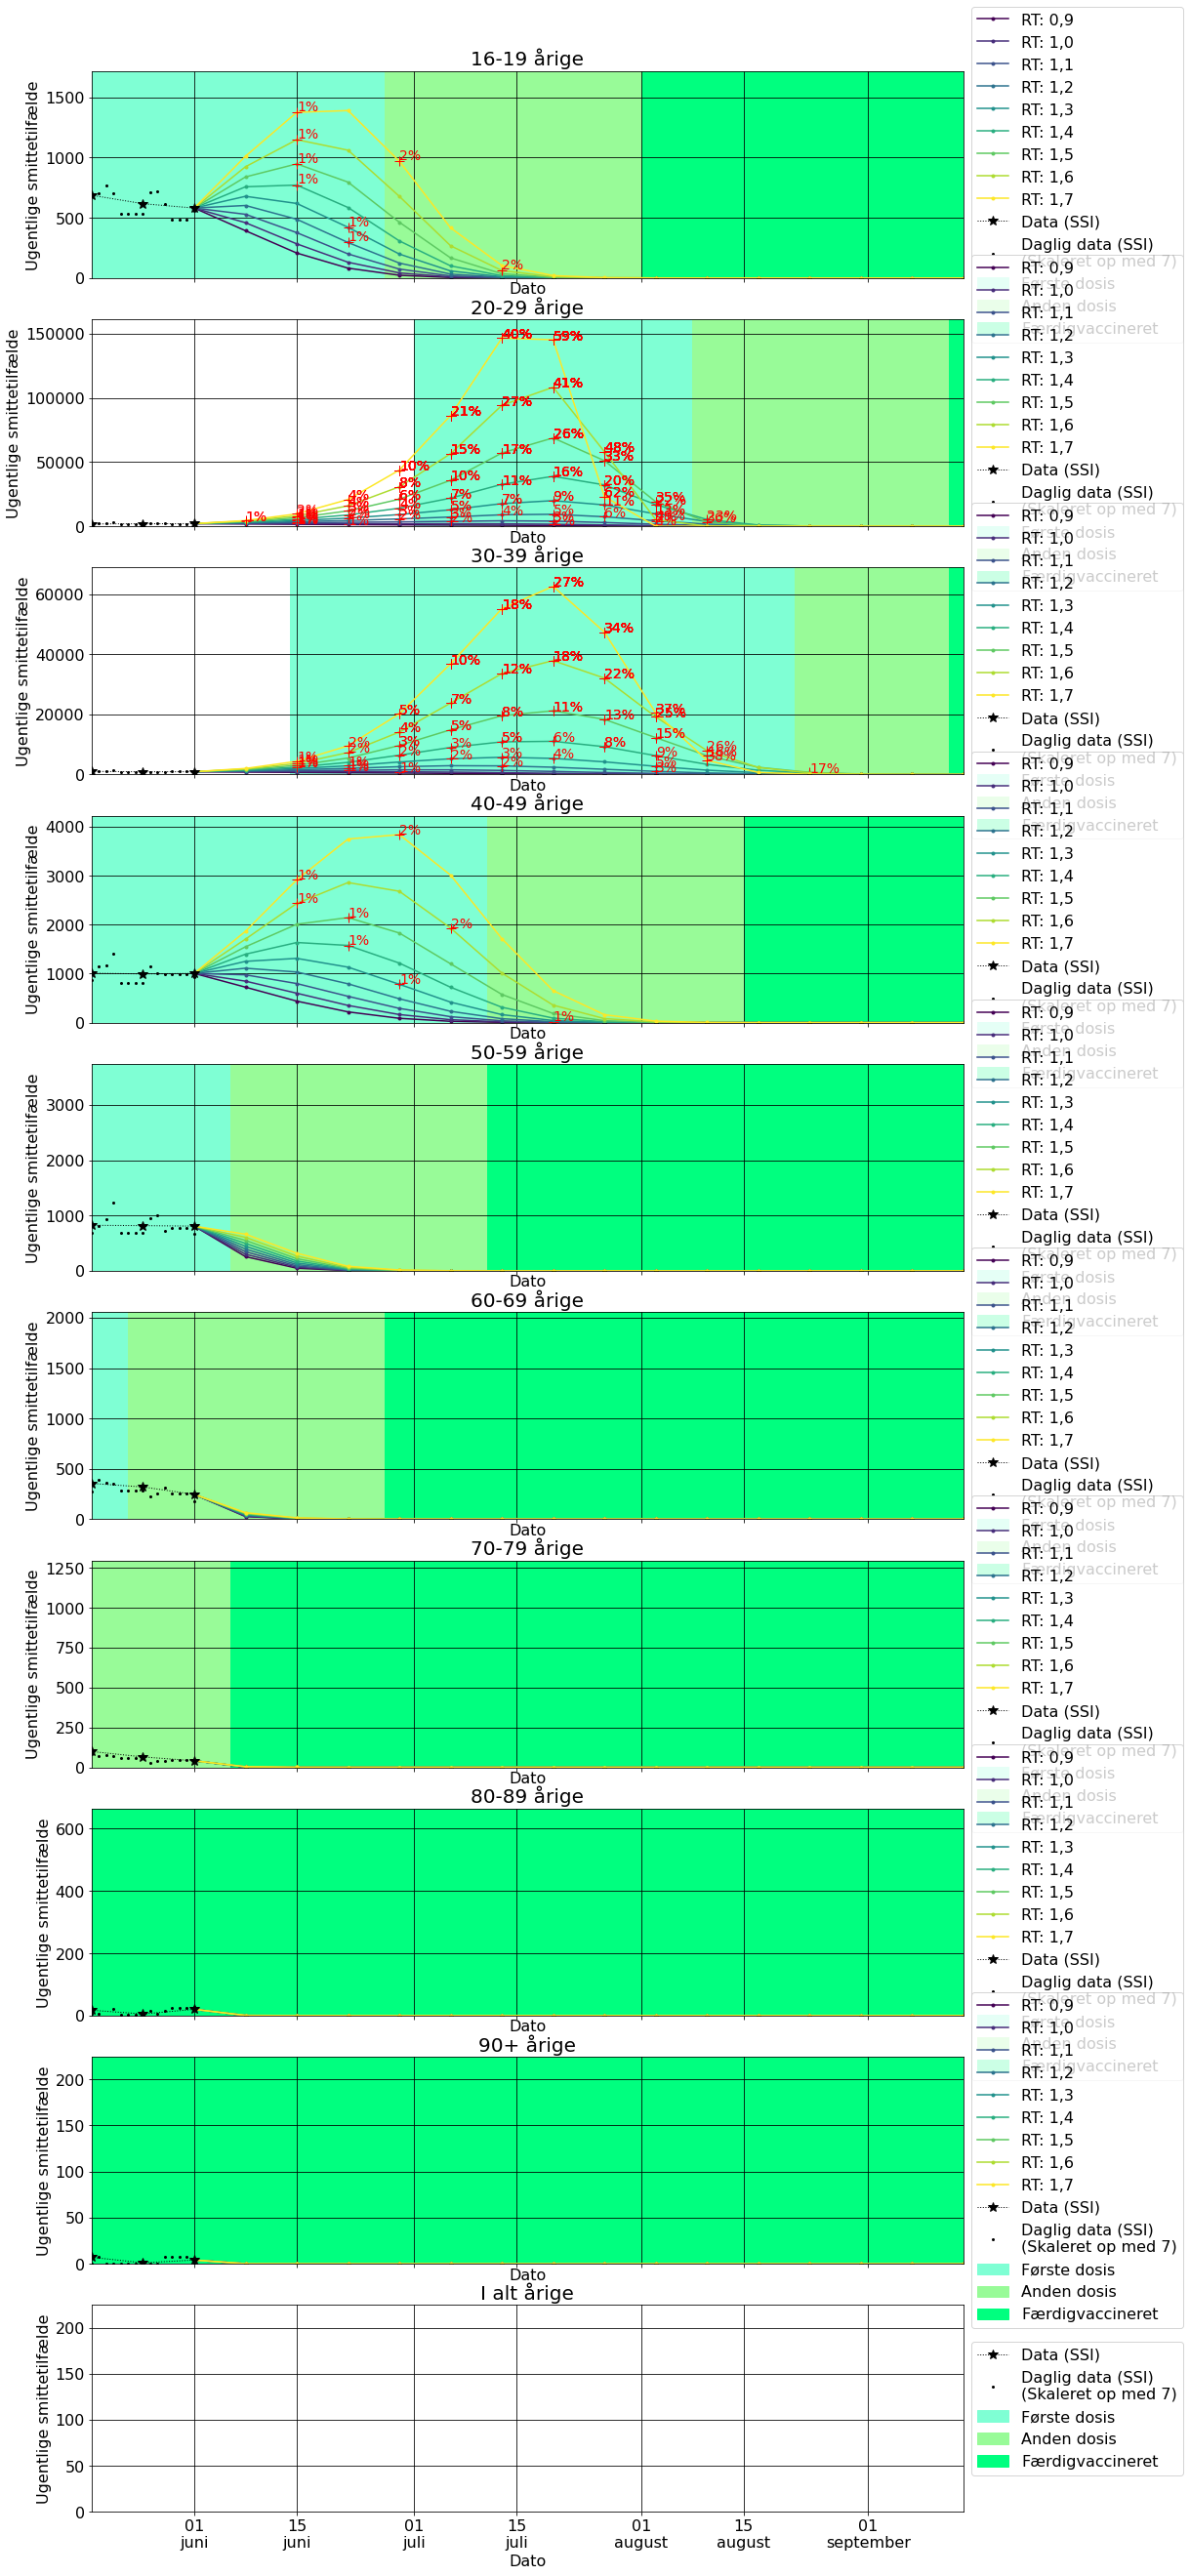

In [14]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

#allRTs = np.arange(0.9,1.8,0.1)
allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

#tStart = np.datetime64('2021-05-18')
tStart = plotDates[-1]+delay_start

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]


    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    plot_vacc(curAx, vaccKal[curAge], tSpanPlot[-1])
    
    # vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]
    #curAx.axvspan(vaccOneIni,vaccOneFin,color='aquamarine',label='Vaccination start')
    ##curAx.axvspan(vaccOneFin,vaccTwoIni,color='yellow',label='Første dosis færdig')
    #curAx.axvspan(vaccTwoIni,vaccTwoFin,color='palegreen',label='Anden dosis start')
    #curAx.axvspan(vaccTwoFin,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    #if (curAge == 'I alt'):
    #    curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                          S0=curPopSize*(1-curImmuneRate), init_count=iniCount)

            modelMax = max(modelCount2)
            top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

            curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                       linewidth=1.5, markersize=6, color=cmap(k))

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            RTArray.append(modelCount2)

            pct_list = list(range(0,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                    if filt and (modelCount2[j+1] < top):
                        pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

        modArray.append(RTArray)


    curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
               linewidth=0.25, markersize=4)

    curAx.set_ylim(bottom=0, top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    curAx.set_xlabel('Dato')

    curAx.grid(color='black')
    # curAx.grid(axis='y')

    curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction.csv')
#model_df.loc[model_df["Age"]=="20-29"]

In [15]:
filt = (model_df["End"].isin(["2021-06-29", "2021-08-03", "2021-08-31"]))

table_cases = model_df.loc[filt, ["End", "Age", "RT", "CountCumul"]]
table_cases = pd.DataFrame(table_cases.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))

table_cases

## styg kommaerne.

CountCumul                                                       \
End     2021-06-29   2021-08-03   2021-08-31   2021-06-29    2021-08-03   
RT             0.9          0.9          0.9          1.0           1.0   
Age                                                                       
10-19   702.109135   706.338385   706.338386   913.166880    922.570388   
20-29  5396.752095  7907.521646  7947.811228  7844.278511  14496.108391   
30-39  2445.595175  3223.324626  3233.949648  3556.972791   5554.574894   
40-49  1468.899686  1503.526201  1503.526618  1961.740744   2040.642316   
50-59   309.939030   309.960103   309.960103   374.460991    374.507434   
60-69    26.791567    26.791639    26.791639    31.769996     31.770156   
70-79     1.492301     1.492301     1.492301     1.751595      1.751595   
80-89     0.199288     0.199288     0.199288     0.233543      0.233543   
90+       0.039858     0.039858     0.039858     0.046709      0.046709   

                                                                             \
End      2021-08-31    2021-06-29    2021-08-03    2021-08-31    2021-06-29   
RT              1.0           1.1           1.1           1.1           1.2   
Age                                                                           
10-19    922.570394   1176.779328   1196.187584   1196.187605   1505.294871   
20-29  14680.690482  11289.411539  27584.727429  28272.650536  16073.190727   
30-39   5606.455680   5123.405096   9920.176690  10133.970832   7302.142381   
40-49   2040.644311   2599.360599   2766.491990   2766.500188   3421.337625   
50-59    374.507434    446.445702    446.540700    446.540700    526.577991   
60-69     31.770156     37.141677     37.142003     37.142003     42.919418   
70-79      1.751595      2.025732      2.025732      2.025732      2.314359   
80-89      0.233543      0.269643      0.269643      0.269643      0.307525   
90+        0.046709      0.053929      0.053929      0.053929      0.061505   

       ...                                                             \
End    ...     2021-08-31    2021-06-29     2021-08-03     2021-08-31   
RT     ...            1.4           1.5            1.5            1.5   
Age    ...                                                              
10-19  ...    2541.254790   3042.056373    3249.654598    3249.656528   
20-29  ...  180097.042668  43195.036971  275116.149982  278553.668543   
30-39  ...   65920.592692  19719.400342  105893.143697  115300.188726   
40-49  ...    6969.314381   7527.406190    9533.980639    9534.747832   
50-59  ...     715.045904    824.037039     825.018760     825.018760   
60-69  ...      55.758860     62.854384      62.857695      62.857695   
70-79  ...       2.934060      3.264767       3.264768       3.264768   
80-89  ...       0.388433      0.431375       0.431375       0.431375   
90+    ...       0.077686      0.086275       0.086275       0.086275   

                                                                 \
End      2021-06-29     2021-08-03     2021-08-31    2021-06-29   
RT              1.6            1.6            1.6           1.7   
Age                                                               
10-19   3806.970517    4147.474791    4147.479631   4741.328719   
20-29  58594.467575  381093.244321  381093.244321  78523.626225   
30-39  26809.925146  173291.914105  184055.361700  36022.200964   
40-49   9675.835986   13069.400386   13071.318813  12362.917075   
50-59    945.415335     947.013911     947.013911   1079.770087   
60-69     70.433362      70.438726      70.438726     78.518350   
70-79      3.609215       3.609217       3.609217      3.967333   
80-89      0.475933       0.475933       0.475933      0.522080   
90+        0.095187       0.095187       0.095187      0.104416   

                                     
End       2021-08-03     2021-08-31  
RT               1.7            1.7  
Age                                  
10-19    5283.297247    5283.3

In [16]:
print(model_df["End"].unique())
filt = (model_df["End"].isin(["2021-06-29", "2021-07-13", "2021-07-20", "2021-08-03", "2021-08-31"]))
#filt = (model_df["End"].isin(["2021-06-01", "2021-06-29"]))

table_hosp = model_df.loc[filt, ["End", "Age", "RT", "HospCumul"]]
table_hosp = pd.DataFrame(table_hosp.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))
table_hosp.loc['I alt',:] = table_hosp.sum(axis=0)

table_hosp

['2021-06-01T00:00:00.000000000' '2021-06-08T00:00:00.000000000'
 '2021-06-15T00:00:00.000000000' '2021-06-22T00:00:00.000000000'
 '2021-06-29T00:00:00.000000000' '2021-07-06T00:00:00.000000000'
 '2021-07-13T00:00:00.000000000' '2021-07-20T00:00:00.000000000'
 '2021-07-27T00:00:00.000000000' '2021-08-03T00:00:00.000000000'
 '2021-08-10T00:00:00.000000000' '2021-08-17T00:00:00.000000000'
 '2021-08-24T00:00:00.000000000' '2021-08-31T00:00:00.000000000'
 '2021-09-07T00:00:00.000000000' '2021-09-14T00:00:00.000000000']


HospCumul                                                              \
End    2021-06-29  2021-07-13  2021-07-20  2021-08-03  2021-08-31  2021-06-29   
RT            0.9         0.9         0.9         0.9         0.9         1.0   
Age                                                                             
10-19    3.019069    3.037123    3.037248    3.037255    3.037255    3.926618   
20-29   84.189333  108.946471  117.011145  123.357338  123.985855  122.370745   
30-39   75.568891   93.102417   96.984052   99.600731   99.929044  109.910459   
40-49   68.744505   70.315217   70.360168   70.365026   70.365046   91.809467   
50-59   21.354799   21.356250   21.356251   21.356251   21.356251   25.800362   
60-69    2.325508    2.325514    2.325514    2.325514    2.325514    2.757636   
70-79    0.245931    0.245931    0.245931    0.245931    0.245931    0.288663   
80-89    0.110944    0.110944    0.110944    0.110944    0.110944    0.130013   
90+      0.003320    0.003320    0.003320    0.003320    0.003320    0.003891   
I alt  255.562300  299.443188  311.434573  320.402310  321.359161  356.997853   

                                                       ...               \
End    2021-07-13  2021-07-20  2021-08-03  2021-08-31  ...   2021-06-29   
RT            1.0         1.0         1.0         1.0  ...          1.6   
Age                                                    ...                
10-19    3.966655    3.967028    3.967053    3.967053  ...    16.369973   
20-29  180.172300  203.764633  226.139291  229.018772  ...   914.073694   
30-39  150.690803  162.195478  171.636364  173.239481  ...   828.426687   
40-49   95.350811   95.484927   95.502060   95.502154  ...   452.829124   
50-59   25.803559   25.803562   25.803562   25.803562  ...    65.139117   
60-69    2.757650    2.757650    2.757650    2.757650  ...     6.113616   
70-79    0.288663    0.288663    0.288663    0.288663  ...     0.594799   
80-89    0.130013    0.130013    0.130013    0.130013  ...     0.264952   
90+      0.003891    0.003891    0.003891    0.003891  ...     0.007929   
I alt  459.164346  494.395844  526.228547  530.711237  ...  2283.819891   

                                                                          \
End     2021-07-13   2021-07-20    2021-08-03    2021-08-31   2021-06-29   
RT             1.6          1.6           1.6           1.6          1.7   
Age                                                                        
10-19    17.781913    17.827937     17.834142     17.834162    20.387713   
20-29  3266.433977  4956.957023   5945.054611   5945.054611  1224.968569   
30-39  2600.585185  3771.526926   5354.720146   5687.310677  1113.086010   
40-49   590.465425   607.159951    611.647938    611.737720   578.584519   
50-59    65.248865    65.249249     65.249258     65.249258    74.396159   
60-69     6.114081     6.114081      6.114081      6.114081     6.815393   
70-79     0.594799     0.594799      0.594799      0.594799     0.653816   
80-89     0.264952     0.264952      0.264952      0.264952     0.290642   
90+       0.007929     0.007929      0.007929      0.007929     0.008698   
I alt  6547.497127  9425.702848  12001.487857  12334.168191  3019.191519   

                                                              
End     2021-07-13    2021-07-20    2021-08-03    2021-08-31  
RT             1.7           1.7           1.7           1.7  
Age                                                           
10-19    22.621376     22.705767     22.718178     22.718227  
20-29  4859.158274   7127.297201   7487.272605   7487.272605  
30-39  3956.680504   5891.631172   7989.551448   8156.713415  
40-49   799.624225    830.227339    839.215978    839.424162  
50-59    74.569645     74.570368     74.570387     74.570387  
60-69     6.816125      6.816126      6.816126      6.816126  
70-79     0.653817      0.653817      0.653817      0.653817  
80-89     0.290642      0.290642      0.290642      0.290642  
9

In [17]:

# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)

delay_start = np.timedelta64(14,'D')

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
# fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

#tStart = np.datetime64('2021-05-18')
tStart = plotDates[-1] +delay_start
print(tStart)

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    #curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    # vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    # curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    # if (curAge == 'I alt'):
    #     curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            for v1 in np.arange(vacc1_min, vacc2_min, 0.05):
                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, 
                                              x1=v1)

                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                # curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                #            linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                for n in range(len(tSpanPlot)):
                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    model_df = model_df.append(new_row, ignore_index=True)

                RTArray.append(modelCount2)

                # pct_list = list(range(1,101,1))
                # for l in pct_list:
                #     for j, c in enumerate(rmc[:-1]/curPopSize):
                #         filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                #         if filt and (modelCount2[j+1] < top):
                #             pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                #             curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                #             curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)


    # urAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
    #            linewidth=0.25, markersize=4)

    # curAx.set_ylim(bottom=0, top=top)

    # curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    # curAx.set_xlim(xLims)

    # curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    # curAx.grid(axis='y')

    # curAx.legend()
    # curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

# if saveFigures:
#     plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction_var_vacc_delayed.csv')
model_df.loc[model_df["Age"]=="30-39"]



2021-06-15 00:00:00


,Age,CaseHospRate,Population,Start,End,RT,Count,CountCumul,vacc1,PctCumul,HospCumul
2772,30-39,0.0309,696679,2021-06-15,2021-06-15,0.9,899.000000,0.000000,0.40,0,0.000000
2773,30-39,0.0309,696679,2021-06-15,2021-06-22,0.9,768.440485,768.440485,0.40,0.00110301,23.744811
2774,30-39,0.0309,696679,2021-06-15,2021-06-29,0.9,649.378885,1417.819370,0.40,0.00203511,43.810619
2775,30-39,0.0309,696679,2021-06-15,2021-07-06,0.9,514.518734,1932.338104,0.40,0.00277364,59.709247
2776,30-39,0.0309,696679,2021-06-15,2021-07-13,0.9,381.333281,2313.671385,0.40,0.003321,71.492446
2777,30-39,0.0309,696679,2021-06-15,2021-07-20,0.9,263.699745,2577.371130,0.40,0.00369951,79.640768
2778,30-39,0.0309,696679,2021-06-15,2021-07-27,0.9,169.665650,2747.036780,0.40,0.00394305,84.883436
2779,30-39,0.0309,696679,2021-06-15,2021-08-03,0.9,101.245229,2848.282009,0.40,0.00408837,88.011914
2780,30-39,0.0309,696679,2021-06-15,2021-08-10,0.9,55.830955,2904.112964,0.40,0.00416851,89.737091
2781,30-39,0.0309,696679,2021-06-15,2021-08-17,0.9,28.333161,2932.446125,0.40,0.00420918,90.612585


In [18]:

# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)

delays = [np.timedelta64(7*i,'D') for i in range(7)]
for delay_start in delays:

    allAges = dfCaseDiff.columns[1:]

    showMax = True

    allRTs = np.arange(0.9,1.8,0.1)

    cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

    #tStart = np.datetime64('2021-05-18')
    tStart = plotDates[-1] + delay_start
    print(tStart)

    tEndWeeks = 16
    tDelta = np.timedelta64(7,'D')

    tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
    tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

    xLims = [tStart-tDelta*2,tSpanPlot[-1]]

    iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]

    weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

    vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

    modArray = []
    for i, age in enumerate(allAges, 0):

        curAge = allAges[i]
        curPopSize = DK_age[1:][i]

        curData = dfCaseDiff[curAge].values
        curDataDaily = dfCaseDiffDaily[curAge].values

        iniCount = iniRow[curAge].values[0]

        dataMax = max(curData)

        if age != "I alt":
            curImmuneRate = immune_rate[1:][i]
            RTArray = []
            for k in range(0,len(allRTs)):
                curRT = allRTs[k]
                for v1 in [0.75]: #np.arange(vacc1_min, vacc2_min, 0.05):
                    modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                                  S0=curPopSize*(1-curImmuneRate), init_count=iniCount, 
                                                  x1=v1)

                    modelMax = max(modelCount2)
                    top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                    modelCount2_cumul = modelCount2.cumsum()
                    rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                    for n in range(len(tSpanPlot)):
                        new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                                   'Start':tStart, 'End':tSpanPlot[n], 
                                   'RT':curRT, 'vacc1':v1, # 'Delay':delay_start, 
                                   'Count':modelCount2[n], 'CountCumul':rmc[n]}
                        model_df = model_df.append(new_row, ignore_index=True)

                    RTArray.append(modelCount2)

                modArray.append(RTArray)


model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

#model_df.to_csv('compare_model_results.csv')



2021-06-01 00:00:00
2021-06-08 00:00:00
2021-06-15 00:00:00
2021-06-22 00:00:00
2021-06-29 00:00:00
2021-07-06 00:00:00
2021-07-13 00:00:00


In [19]:
compare_model_df = model_df.loc[model_df.vacc1==0.75]
compare_model_df = compare_model_df.drop(columns=['Population', 'vacc1', 'CaseHospRate', 'PctCumul'])
print(compare_model_df.columns)
compare_model_df = compare_model_df.groupby(['Start', 'End', 'RT']).sum()

compare_model_df = compare_model_df.reset_index()
compare_model_df.to_csv('compare_model_results.csv')

compare_model_df

Index(['Age', 'Start', 'End', 'RT', 'Count', 'CountCumul', 'HospCumul'], dtype='object')


,Start,End,RT,Count,CountCumul,HospCumul
0,2021-06-01,2021-06-01,0.9,5591.000000,0.000000,0.000000
1,2021-06-01,2021-06-01,1.0,5591.000000,0.000000,0.000000
2,2021-06-01,2021-06-01,1.1,5591.000000,0.000000,0.000000
3,2021-06-01,2021-06-01,1.2,5591.000000,0.000000,0.000000
4,2021-06-01,2021-06-01,1.3,5591.000000,0.000000,0.000000
5,2021-06-01,2021-06-01,1.4,5591.000000,0.000000,0.000000
6,2021-06-01,2021-06-01,1.5,5591.000000,0.000000,0.000000
7,2021-06-01,2021-06-01,1.6,5591.000000,0.000000,0.000000
8,2021-06-01,2021-06-01,1.7,5591.000000,0.000000,0.000000
9,2021-06-01,2021-06-08,0.9,3866.859166,3866.859166,106.001928


# Comparing models

In [20]:
cols = ['CaseHospRate', 'Start', 'End', 'RT', 'Count', 'CountCumul']
compare_model_df = pd.DataFrame(columns=cols)

allAges = dfCaseDiff.columns[1:]
showMax = True

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tEndWeeks = 16
tDelta = np.timedelta64(7,'D')

v1 = 0.75

for delay_start in [np.timedelta64(7*i,'D') for i in range(4)]:
    tStart = plotDates[-1] + delay_start
    
    tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
    tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D')-delay_start,tDelta) # Time span, as datetime64

    xLims = [tStart-tDelta*2,tSpanPlot[-1]]
    iniRow = dfCaseDiff.iloc[plotDates == tStart-delay_start]
    
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        if age != "I alt":
            curImmuneRate = immune_rate[1:][i]
            for n in range(len(tSpanPlot)):
                cols_tmp = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
                tmp_df = pd.DaraFrame(columns=cols_tmp)
                for i, age in enumerate(allAges, 0):

                    curAge = allAges[i]
                    curPopSize = DK_age[1:][i]

                    curData = dfCaseDiff[curAge].values
                    curDataDaily = dfCaseDiffDaily[curAge].values

                    iniCount = iniRow[curAge].values[0]


                    modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                                  S0=curPopSize*(1-curImmuneRate), 
                                                  init_count=iniCount, x1=v1)

                    rmc = [j - modelCount2_cumul[0] for j in modelCount2.cumsum()]

                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    tmp_df = model_df.append(new_row, ignore_index=True)
                
                
                
                new_row = {'Start':tStart, 'End':tSpanPlot[n], 
                           'RT':curRT, 'Delay':delay_start, 
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                compare_model_df.append(tmp_row)
compare_model_df["HospCumul"] = compare_model_df["CountCumul"]*compare_model_df["CaseHospRate"]

compare_model_df#.to_csv('compare_model_results.csv')

,CaseHospRate,Start,End,RT,Count,CountCumul,HospCumul
